Universidad del Valle de Guatemala  
Reinforcement Learning  
Alberto Suriano  

Laboratorio 1  
Marlon Hernández - 15177  


## Task 1

Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.
1. **¿Qué pasa si algunas acciones tienen probabilidades de cero?**  
    Si algunas acciones tienen probabilidades de cero, esas acciones nunca serán elegidas. Esto puede llevar a una exploración insuficiente del espacio de acciones, donde el agente nunca llega a conocer el valor de esas acciones. Esto puede resultar en que el agente se quede en una solución subóptima porque nunca considera otras acciones potencialmente mejores.

2. **¿Qué pasa si la póliza es determinística?**  
   a. **π1(a) = 1 para algún a**
   Una póliza determinística es aquella en la que en un estado dado, el agente siempre selecciona la misma acción, si la póliza asigna una probabilidad de 1 a la acción 𝑎 en cierto estado, esto indica que siempre se seleccionará esa acción cuando el agente se encuentre en ese estado. 
 
3. **Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits**  
    a. **Contextual Bandits**
    Los contextual bandits son una extensión de k-armed bandits que incluyen información de contexto. En un problema de k-armed bandits clásico, el agente selecciona entre k acciones con el objetivo de maximizar la recompensa acumulada. Sin embargo, en los contextual bandits, el agente también observa un contexto antes de seleccionar una acción, entonces la decisión de qué acción tomar depende del contexto observado.
    
    b. **Dueling Bandits**
    Los dueling bandits son una variación donde en lugar de recibir recompensas individuales por cada acción seleccionada, el agente elige pares de acciones para compararlas. La retroalimentación es entre las dos acciones en lugar de una recompensa numérica y recibe una indicación de cuál de las dos acciones seleccionadas es mejor.

    c. **Combination Bandits**
    Los combination bandits son una variante donde el agente selecciona una combinación de acciones en cada paso, en lugar de una sola acción. La recompensa recibida está asociada a la combinación seleccionada, esto aumenta la complejidad del problema porque el espacio de posibles acciones es mucho mayor debido a las combinaciones posibles.

## Task 2
Implemente el algoritmo épsilon-codicioso para el problema de multi-armed bandits para maximizar la recompensa acumulativa en una serie de pruebas. Utilice un entorno con 10 brazos, cada uno de los cuales proporciona una recompensa de una distribución de probabilidad fija diferente. Para esto considere el siguiente set de instrucciones

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Clase Bandit
class Bandit:
    def __init__(self):
        # Inicializar con 10 brazos con probabilidades de recompensa aleatorias entre 0 y 1
        self.probabilities = np.random.rand(10)
    
    def pull(self, arm):
        # Devuelve una recompensa de 1 con la probabilidad del brazo elegido
        return 1 if np.random.rand() < self.probabilities[arm] else 0

# Clase Agent
class Agent:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.q_values = np.zeros(10)  # Recompensas estimadas para cada brazo
        self.arm_counts = np.zeros(10)  # Veces que se ha extraído cada brazo
    
    def select_arm(self):
        # Con probabilidad epsilon, selecciona un brazo aleatorio
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, 10)
        # Con probabilidad 1-epsilon, selecciona el brazo con la recompensa estimada más alta
        else:
            return np.argmax(self.q_values)
    
    def update_estimates(self, arm, reward):
        # Actualiza la recompensa estimada para el brazo elegido
        self.arm_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.arm_counts[arm]


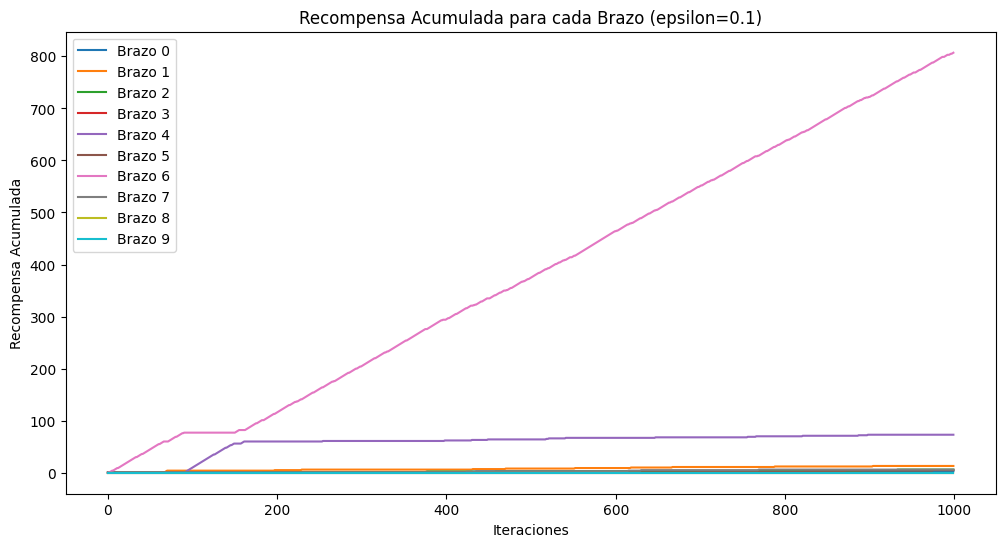

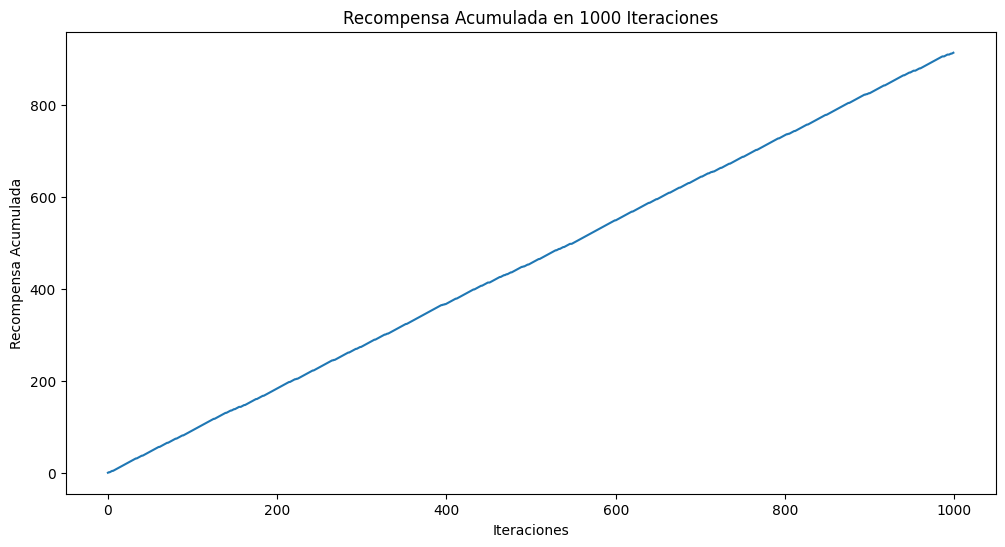

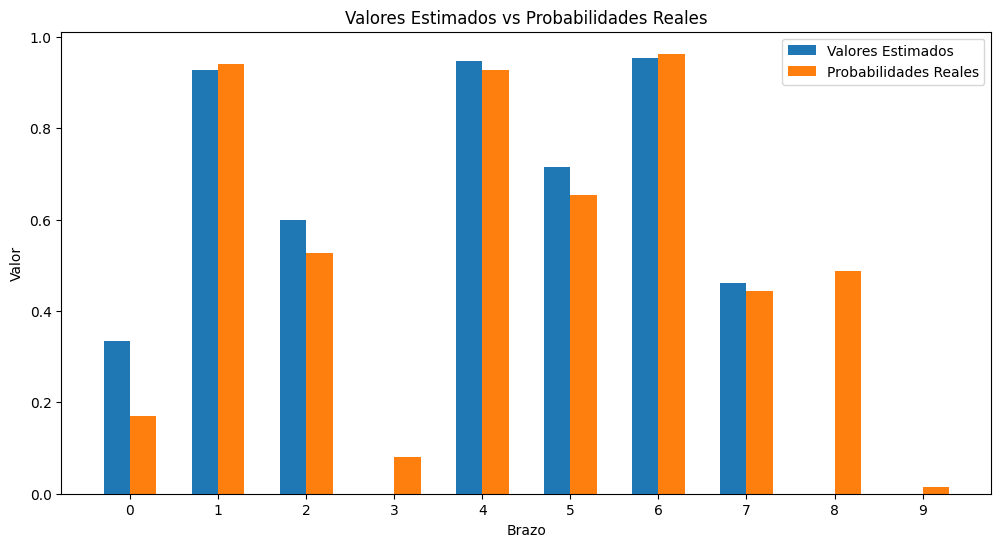

In [25]:
def simulate_bandit(epsilon, iterations=1000):
    agent = Agent(epsilon=epsilon)
    bandit = Bandit()
    arm_rewards = np.zeros((10, iterations))
    rewards = []

    for i in range(iterations):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)
        arm_rewards[arm, i] += reward
        rewards.append(sum(sum(arm_rewards)))

    return arm_rewards, rewards, agent, bandit

epsilon = 0.1
iterations = 1000
arm_rewards, rewards, agent, bandit = simulate_bandit(epsilon, iterations)

cumulative_rewards = np.cumsum(arm_rewards, axis=1)

# Grafica de recompensa acumulada para cada brazo
plt.figure(figsize=(12, 6))
for arm in range(10):
    plt.plot(cumulative_rewards[arm], label=f'Brazo {arm}')
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Acumulada')
plt.title(f'Recompensa Acumulada para cada Brazo (epsilon={epsilon})')
plt.legend()
plt.show()

# Grafica de recompensa acumulada en las pruebas
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Acumulada')
plt.title('Recompensa Acumulada en 1000 Iteraciones')
plt.show()

# Grafica de los valores estimados de cada brazo versus las probabilidades reales
arms = np.arange(10)
bar_width = 0.3
index = np.arange(len(arms))
plt.figure(figsize=(12, 6))
plt.bar(index, agent.q_values, bar_width, label='Valores Estimados')
plt.bar(index + bar_width, bandit.probabilities, bar_width, label='Probabilidades Reales')
plt.xlabel('Brazo')
plt.ylabel('Valor')
plt.title('Valores Estimados vs Probabilidades Reales')
plt.xticks(index + bar_width / 2, arms)
plt.legend()
plt.show()

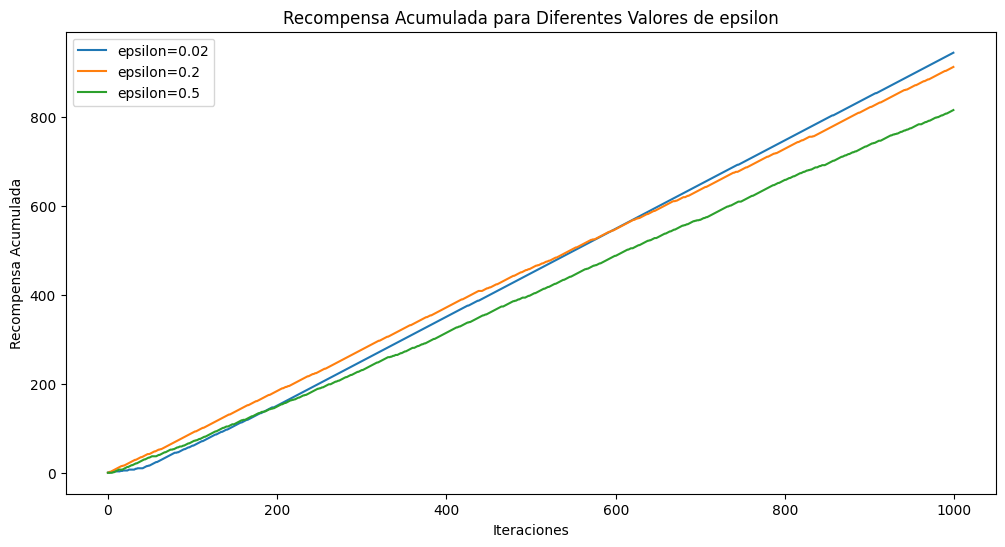

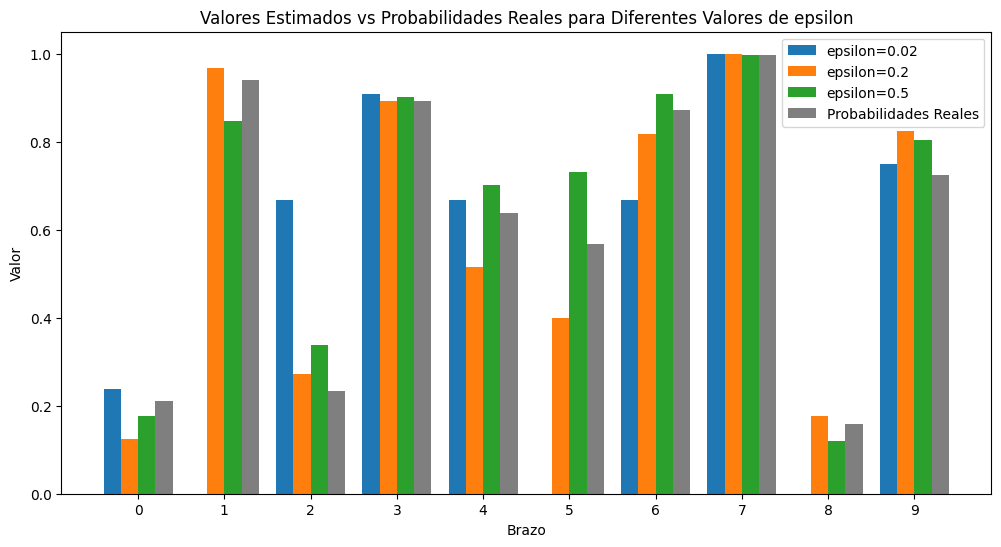

In [27]:
# Diferentes valores de epsilon y observar el efecto en el equilibrio de exploracion y explotacion
epsilons = [0.02, 0.2, 0.5]
results = {}
bandit = Bandit()

for epsilon in epsilons:
    agent = Agent(epsilon=epsilon)
    total_rewards = 0
    rewards = []

    for _ in range(1000):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)
        total_rewards += reward
        rewards.append(total_rewards)
    
    results[epsilon] = (rewards, agent.q_values.copy())

# Recompensa acumulada para diferentes valores de epsilon
plt.figure(figsize=(12, 6))
for epsilon, (rewards, _) in results.items():
    plt.plot(rewards, label=f'epsilon={epsilon}')
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Acumulada')
plt.title('Recompensa Acumulada para Diferentes Valores de epsilon')
plt.legend()
plt.show()

# Grafica de los valores estimados versus probabilidades reales
bar_width = 0.2
index = np.arange(10)
plt.figure(figsize=(12, 6))
for i, epsilon in enumerate(epsilons):
    _, q_values = results[epsilon]
    plt.bar(index + i * bar_width, q_values, bar_width, label=f'epsilon={epsilon}')
plt.bar(index + len(epsilons) * bar_width, bandit.probabilities, bar_width, label='Probabilidades Reales', color='k', alpha=0.5)
plt.xlabel('Brazo')
plt.ylabel('Valor')
plt.title('Valores Estimados vs Probabilidades Reales para Diferentes Valores de epsilon')
plt.xticks(index + bar_width * len(epsilons) / 2, index)
plt.legend()
plt.show()


Referencias
* https://medium.com/@joancerretanids/aprendizaje-por-refuerzo-rl-cap%C3%ADtulo-3-multi-armed-bandit-parte-1-epsilon-greedy-y-99aadba10cdf
* https://towardsdatascience.com/reinforcement-learning-multi-arm-bandit-implementation-5399ef67b24b
* https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c